# Project 1: Perform BFS and DFS analysis on Facebook SN Dataset

Name: **Abhiroop Sarkar**

Dept: **CSE(AIML)**

Roll no: **02**

Sem: **5**

## Data Preparation

In [1]:
import networkx as nx  #https://www.geeksforgeeks.org/networkx-python-software-package-study-complex-networks/
import matplotlib.pyplot as plt

# Load the dataset
# Assuming the dataset is in a file called 'facebook_combined.txt'
# The file contains edges in the format: node1 node2

G = nx.read_edgelist('facebook_combined.txt')

# Basic info about the graph
V = G.number_of_nodes()
E = G.number_of_edges()
print(f"Number of nodes: {V}")
print(f"Number of edges: {E}")
print(f"Is the graph directed: {G.is_directed()}")
print(f"Graph density: {nx.density(G)}")

# Define start and goal nodes
start_node = '0'  # Example start node
goal_node = '100'  # Example goal node

# Ensure start_node and goal_node are in the graph
if start_node not in G or goal_node not in G:
    raise ValueError("Start or goal node not in graph")

Number of nodes: 4039
Number of edges: 88234
Is the graph directed: False
Graph density: 0.010819963503439287


### Preparing Adjacency Matrix

In [2]:
adj = nx.adjacency_matrix(G).toarray()
print(adj)

[[0 1 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## BFS

In [44]:
def bfs(source: int, solution: int):
    global steps, path, visited
    queue = [source]
    visited[source] = 1

    while queue:
        current_node = queue.pop(0)
        path.append(current_node)
        print(current_node, end=" ")

        if current_node == solution:
            return True

        for i in range(V):
            if adj[current_node][i] == 1 and visited[i] == 0:
                queue.append(i)
                visited[i] = 1
                edges.append((current_node, i))
                steps += 1

    return False

visited = [0 for _ in range(V)]
steps = 0
nodes = []
edges = []

start = int(input("Enter start node (index): "))
sol = int(input("Enter solution node (index): "))

print(f"BFS sequence from {start} to {sol} is: ")
if not bfs(start, sol):
    print("\nSolution not found.")
print("\nSteps:", steps)

Enter start node (index): 0
Enter solution node (index): 100
BFS sequence from 0 to 100 is: 
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 
Steps: 358


### Visualization of BFS

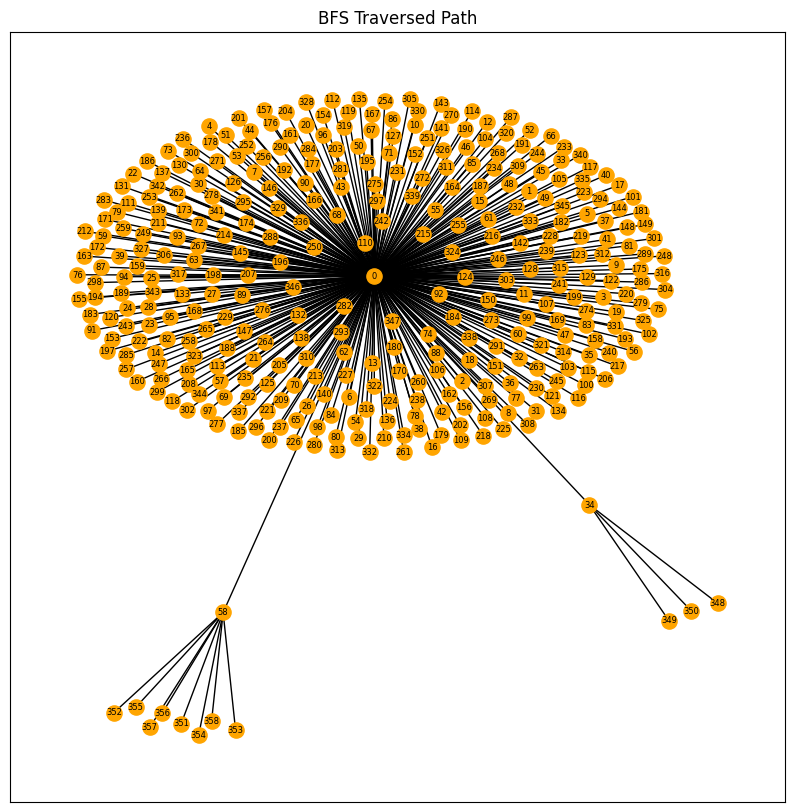

In [54]:
#nx.draw_networkx_edges(G1, pos=nx.spring_layout(G1), edge_color='cyan')
G1=nx.Graph()
G1.add_edges_from(edges)
plt.figure(figsize=(10, 10))
nx.draw_networkx(G1, pos=nx.spring_layout(G1), with_labels=True, node_color='orange', font_size=6, node_size=120)
plt.title("BFS Traversed Path")
plt.show()

## DFS

In [42]:
def dfs(node: int, solution: int):
    global Steps, edgesdfs, visited
    print(node+1, end=" ")
    if node == solution:  return True
    visited[node] = 1
    for i in range(V):
        if adj[node][i] == 1 and visited[i] == 0:
            Steps += 1
            edgesdfs.append((node, i))
            if dfs(i, solution):  return True
    return False

visited = [0 for _ in range(V)]
edgesdfs = []
start = int(input("Enter start node (index): "))
sol = int(input("Enter solution node (index): "))
Steps = 0
print(f"DFS sequence from {start} to {sol} is: ")
if not dfs(start-1, sol-1): print("\nSolution not found.")
print(f"\nSteps taken = {Steps}")

Enter start node (index): 0
Enter solution node (index): 100
DFS sequence from 0 to 100 is: 
0 1828 1755 350 35 1 2 49 31 10 4 26 22 14 27 41 30 17 83 57 56 68 11 143 32 8 23 88 6 123 46 105 99 60 119 66 204 51 110 120 28 55 54 25 58 81 89 74 127 261 161 171 63 97 134 142 39 118 78 232 107 170 104 137 121 248 278 40 70 106 149 114 67 135 133 73 166 122 207 179 187 124 201 76 86 157 189 80 186 272 64 262 173 129 151 65 101 164 174 167 199 349 108 59 172 190 218 325 200 162 214 131 192 205 93 95 102 181 188 195 197 250 243 159 61 240 177 291 281 154 233 213 253 224 212 223 239 266 85 52 24 62 194 9 92 111 260 202 246 265 84 238 100 
Steps taken = 152


### Visualization of DFS

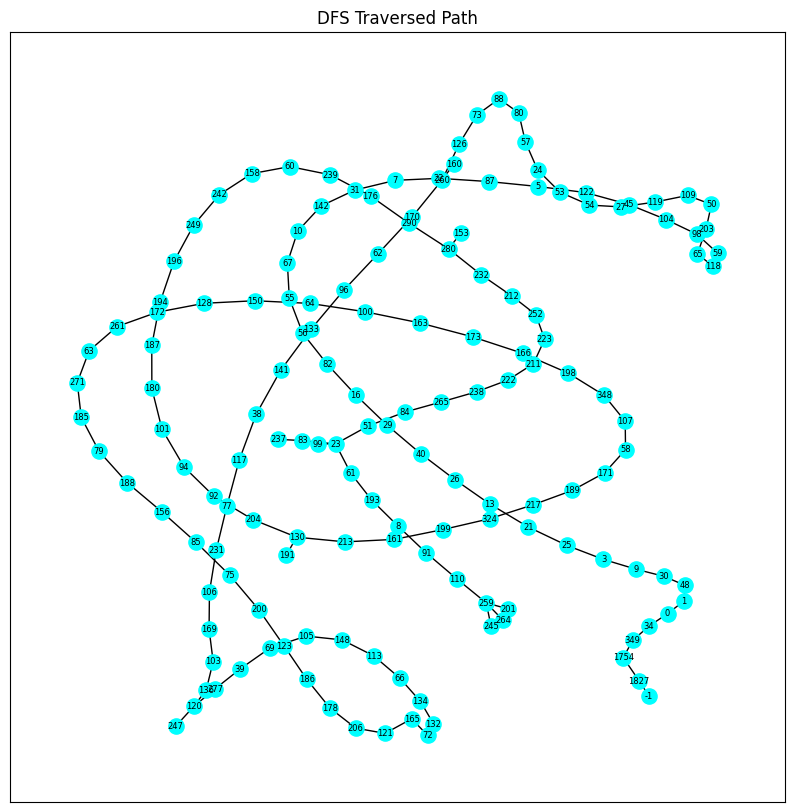

In [53]:
G2=nx.Graph()
G2.add_edges_from(edgesdfs)
plt.figure(figsize=(10, 10))
nx.draw_networkx(G2, pos=nx.spring_layout(G2), with_labels=True, node_color='cyan', font_size=6, node_size=120)
plt.title("DFS Traversed Path")
plt.show()